In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, auc, f1_score, roc_curve, roc_auc_score, precision_recall_curve 
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit,RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from imblearn.over_sampling import SMOTE

import pickle
import os
import re

In [2]:
pd.set_option('display.max_columns', None)

In [5]:
with open('C:/Users/aksha/Project/Intrusion_pickle/train.pkl','rb') as to_read:
    x_train,y_train = pickle.load(to_read)
with open('C:/Users/aksha/Project/Intrusion_pickle/test.pkl','rb') as to_read:
    x_test,y_test = pickle.load(to_read)
with open('C:/Users/aksha/Project/Intrusion_pickle/saved_dict.pkl','rb') as to_read:
    saved_dict = pickle.load(to_read)

In [7]:
with open('C:/Users/aksha/Project/Intrusion_pickle/xtrain.pkl','rb') as to_read:
    xtrain,ytrain = pickle.load(to_read)

In [9]:
with open('C:/Users/aksha/Project/Intrusion_pickle/xval.pkl','rb') as to_read:
    xval,yval = pickle.load(to_read)

In [11]:
x_train = x_train.sparse.to_dense()

In [13]:
x_test = x_test.sparse.to_dense()

In [15]:
x_train.head()

,id,dur,sttl,sinpkt,dinpkt,swin,dtcpb,tcprtt,synack,ackdat,smean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_dst_sport_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports,dmean_log1p,spkts_log1p,dpkts_log1p,network_bytes_log1p,sjit_log1p,djit_log1p,stcpb_log1p,sload_log1p,dttl_log1p,dload_log1p,rate_log1p,service_None,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,proto_cbt,proto_cftp,proto_chaos,proto_compaq-peer,proto_cphb,proto_cpnx,proto_crtp,proto_crudp,proto_dcn,proto_ddp,proto_ddx,proto_dgp,proto_egp,proto_eigrp,proto_emcon,proto_encap,proto_etherip,proto_fc,proto_fire,proto_ggp,proto_gmtp,proto_gre,proto_hmp,proto_i-nlsp,proto_iatp,proto_ib,proto_icmp,proto_idpr,proto_idpr-cmtp,proto_idrp,proto_ifmp,proto_igmp,proto_igp,proto_il,proto_ip,proto_ipcomp,proto_ipcv,proto_ipip,proto_iplt,proto_ipnip,proto_ippc,proto_ipv6,proto_ipv6-frag,proto_ipv6-no,proto_ipv6-opts,proto_ipv6-route,proto_ipx-n-ip,proto_irtp,proto_isis,proto_iso-ip,proto_iso-tp4,proto_kryptolan,proto_l2tp,proto_larp,proto_leaf-1,proto_leaf-2,proto_merit-inp,proto_mfe-nsp,proto_mhrp,proto_micp,proto_mobile,proto_mtp,proto_mux,proto_narp,proto_netblt,proto_nsfnet-igp,proto_nvp,proto_ospf,proto_pgm,proto_pim,proto_pipe,proto_pnni,proto_pri-enc,proto_prm,proto_ptp,proto_pup,proto_pvp,proto_qnx,proto_rdp,proto_rsvp,proto_rtp,proto_rvd,proto_sat-expak,proto_sat-mon,proto_sccopmce,proto_scps,proto_sctp,proto_sdrp,proto_secure-vmtp,proto_sep,proto_skip,proto_sm,proto_smp,proto_snp,proto_sprite-rpc,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,-1.732041,-0.191029,0.703839,-0.132788,-0.080885,1.092456,0.911123,-0.521660,-0.484346,-0.503014,-0.458048,-0.136415,-0.039557,-0.775991,-1.366486,-0.645013,-0.554373,-0.118590,-0.189768,-0.715714,-0.126508,0.506480,-0.068307,0.140261,-0.350206,-0.010753,0.104541,1.012541,-0.937019,1.305694,0.591119,-0.852011,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.732021,-0.109485,-1.141901,-0.129251,-0.073735,1.092456,1.557251,-0.521660,-0.484346,-0.503014,-0.414076,-0.136415,-0.039557,3.147666,-0.318711,-0.645013,-0.554373,-0.118590,-0.189768,-0.715714,-0.126508,1.782708,0.597577,1.463624,1.761910,0.167339,1.754712,1.090596,-1.049058,1.302438,1.295137,-0.838341,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,

In [17]:
x_test.shape

(82327, 187)

In [19]:
x_train.shape

(175341, 187)

<BarContainer object of 2 artists>

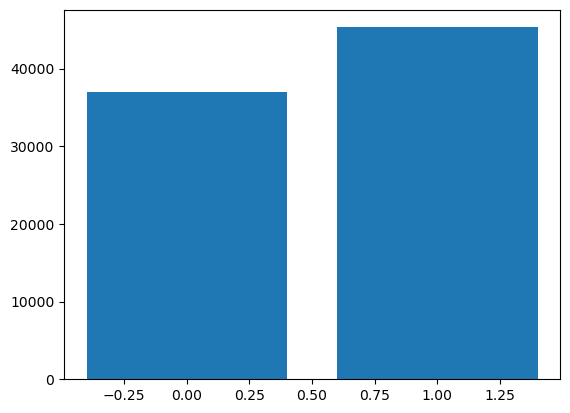

In [21]:
plt.bar(y_test.value_counts().index,y_test.value_counts())

In [23]:
y_test.value_counts()

label
1    45329
0    36998
Name: count, dtype: int64

**FUNCTIONS**

In [26]:
def hyperparameter_tuning(clf,parameters,refit,search,cv,x_train,y_train):
    scoring = ['accuracy','f1','recall','precision']
    if search == 'GridSearchCV':
        tuned_clf = GridSearchCV(clf,param_grid = parameters, scoring = scoring,cv = cv,refit = refit, return_train_score=True,n_jobs = 7)
        result = tuned_clf.fit(x_train,y_train)
    elif search =='randomsearch':
        tuned_clf = RandomizedSearchCV(clf,param_distributions=parameters, scoring=scoring, refit= refit, cv=cv , return_train_score=True,n_jobs = 7, n_iter=10, random_state=42)
        result = tuned_clf.fit(x_train, y_train)
    return result 

In [28]:
def parameter_evalutation(clf,parameters,refit,param1,param2 = None):
    test_scoring = {
        'f1':'mean_test_f1',
        'precision':'mean_test_precision',
        'accuracy':'mean_test_accuracy',
        'recall':'mean_test_recall'
    }
    train_scoring = {
        'f1':'mean_train_f1',
        'precision':'mean_train_precision',
        'accuracy':'mean_train_accuracy',
        'recall':'mean_train_recall'
    }

    fixed_params = [p for p in parameters.keys() if p not in [param1,param2]]
    mask = np.ones(len(clf.cv_results_['params']),dtype = bool)
    for p in fixed_params:
        best_value = clf.best_params_[p]
        mask &= np.array([best_value == params[p] for params in clf.cv_results_['params']])
    
    train = clf.cv_results_[train_scoring[refit]][mask]
    test = clf.cv_results_[test_scoring[refit]][mask]

    print(f'Best score = {clf.best_score_:.2f}')
    print(f'Best parameters = {clf.best_params_}')

    if param2 == None:
        plt.figure(figsize=(10, 5))
        plt.plot(np.log10(parameters[param1]),train,label = 'Train')
        plt.plot(np.log10(parameters[param1]),test, label = 'test')

        for i,val in enumerate(train):
            plt.annotate((parameters[param1][i],np.round(val, 3)),(np.log10(parameters[param1])[i],train[i]))

        for i,val in enumerate(test):
            plt.annotate((parameters[param1][i],np.round(val, 3)),(np.log10(parameters[param1])[i],test[i]))

        plt.xlabel(param1)
        plt.ylabel(f"{refit} Score")
        plt.legend()
        plt.show()
    
    else:
        fig, ax = plt.subplots(1, 2, figsize=(14, 6))        
        sns.heatmap(train.reshape(len(parameters[param1]),len(parameters[param2])),cmap = sns.light_palette('blue'),annot = True
                   ,xticklabels = parameters[param2],yticklabels = parameters[param1],ax = ax[0])
        sns.heatmap(test.reshape(len(parameters[param1]),len(parameters[param2])),cmap = sns.light_palette('blue'),annot = True
                   ,xticklabels = parameters[param2],yticklabels = parameters[param1],ax = ax[1])
        ax[0].set_title("Train hyperparam heatmap")
        ax[0].set_xlabel(param2)
        ax[0].set_ylabel(param1)

        ax[1].set_title("Test hyperparam heatmap")
        ax[1].set_xlabel(param2)
        ax[1].set_ylabel(param1)
        plt.show()

In [30]:
def pred_scores(clf, name, Xtest=None, Ytest=None, Xtrain=None, Ytrain=None, metric='recall'):
    import re
    if Xtest is None or Ytest is None:
        raise ValueError("Xtest and Ytest must be provided.")

    best_est = clf.best_estimator_
    Ypred = best_est.predict(Xtest)
    print(name.upper() + " PREDICTION PERFORMANCE")
    print(f"Accuracy = {accuracy_score(Ytest,Ypred):.4f}")
    print(f"Recall = {recall_score(Ytest,Ypred):.4f}")
    print(f"Precision = {precision_score(Ytest,Ypred):.4f}")
    print(f"F1 = {f1_score(Ytest,Ypred):.4f}")

    fig, axs = plt.subplots(2, 2, figsize=(18, 12))

    # Confusion Matrix
    cm = confusion_matrix(Ytest, Ypred, labels=best_est.classes_)
    disp = ConfusionMatrixDisplay(cm, display_labels=best_est.classes_)
    disp.plot(ax=axs[0][0], values_format='d')
    axs[0][0].set_title('Confusion Matrix', fontsize=18, fontweight="bold")
    axs[0][0].set_xlabel('Predicted label', fontsize=14)
    axs[0][0].set_ylabel('True label', fontsize=14)

    # Feature importances
    feature_importances = None
    if hasattr(best_est, "feature_importances_"):
        feature_importances = best_est.feature_importances_
    elif hasattr(best_est, "coef_"):
        feature_importances = np.abs(best_est.coef_).flatten()

    if feature_importances is not None:
        feat_cols = Xtest.columns if Xtest is not None else Xtrain.columns
        feat_importances = pd.DataFrame({
            "Feature": feat_cols,
            "Importance": feature_importances
        }).sort_values(by="Importance", ascending=False).head(20)

        axs[0][1].barh(feat_importances["Feature"], feat_importances["Importance"], color="royalblue")
        axs[0][1].invert_yaxis()
        axs[0][1].set_xlabel("Importance / Coefficient Magnitude", fontsize=14)
        axs[0][1].set_title(f"Top 20 Feature Importances from {name}", fontsize=16, fontweight="bold")
    else:
        axs[0][1].axis('off')
        axs[0][1].set_title("No Feature Importances", fontsize=18)

    # ROC Curve
    proba = clf.predict_proba(Xtest)[:, 1]
    clf_auc = roc_auc_score(Ytest, proba)
    fpr, tpr, _ = roc_curve(Ytest, proba)
    axs[1][0].plot(fpr, tpr, label=f'AUC = {clf_auc:.4f}')
    axs[1][0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    axs[1][0].set_title("ROC Curve", fontsize=18, fontweight="bold")
    axs[1][0].set_xlabel('False Positive Rate', fontsize=14)
    axs[1][0].set_ylabel('True Positive Rate', fontsize=14)
    axs[1][0].legend(fontsize=12)
    axs[1][0].grid(True)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(Ytest, proba)
    pr_auc = auc(recall, precision)
    axs[1][1].plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}', color='purple')
    axs[1][1].set_title("Precision-Recall Curve", fontsize=18, fontweight="bold")
    axs[1][1].set_xlabel("Recall", fontsize=14)
    axs[1][1].set_ylabel("Precision", fontsize=14)
    axs[1][1].legend(fontsize=12)
    axs[1][1].grid(True)

    plt.tight_layout()
    plt.show()

    # Visualize decision tree if applicable
    if re.search(r'\bdecision\s*tree\b', name, re.IGNORECASE):
        plt.figure(figsize=(24, 10))
        plot_tree(
            best_est,
            max_depth=2,
            feature_names=Xtrain.columns,
            class_names={0: 'No Attack', 1: 'Attack'},
            fontsize=14,
            filled=True
        )
        plt.title("Decision Tree Visualization", fontsize=20, fontweight="bold")
        plt.tight_layout()
        plt.show()


In [32]:
def make_table(clf, name, score):
    scoring = {
        'f1':'mean_test_f1',
        'precision':'mean_test_precision',
        'accuracy':'mean_test_accuracy',
        'recall':'mean_test_recall'
    }
    cv_results = pd.DataFrame(clf.cv_results_)
    results = cv_results[cv_results['params'] == clf.best_params_].iloc[0] #results = cv_results.iloc[cv_results[scoring[score]].idxmax()]
    f1 = results.mean_test_f1
    precision = results.mean_test_precision
    recall = results.mean_test_recall
    accuracy = results.mean_test_accuracy
    table = pd.DataFrame([{'Name':name,
                         'Precision':precision,
                         'Accuracy':accuracy,
                         'Recall':recall,
                         'F1':f1}])
    return table

In [34]:
def make_table_results(clf,name,threshold,x_test,y_test):
    probab = np.array((clf.predict_proba(x_test)[:,1] > threshold).astype(int))
    proba = clf.predict_proba(x_test)[:,1]
    clf_auc = roc_auc_score(y_test, proba)
    f1= f1_score(y_test,probab)
    accuracy = accuracy_score(y_test, probab)
    recall = recall_score(y_test, probab)
    precision = precision_score(y_test, probab)
    results = pd.DataFrame([{'Name':name,
                         'Precision':precision,
                         'Accuracy':accuracy,
                         'Recall':recall,
                         'F1':f1,
                         'AUC':clf_auc}])
    return results   

**MACHINE LEARNING**

**GRIDSEARCH**

**LOGISTIC REGRESSION**

In [39]:
logreg = LogisticRegression(solver='liblinear', max_iter=1000)
logreg_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'class_weight': [None, 'balanced']
}

In [ ]:
%time logreg_grid = hyperparameter_tuning(logreg,logreg_params,'recall','GridSearchCV',5,x_train,y_train)

In [ ]:
#with open(os.path.join(os.getcwd(),'ML_models_results/logreg_grid.pkl'),'wb') as to_write:
#    pickle.dump(logreg_grid,to_write)

#with open(os.path.join(os.getcwd(),'ML_models_results/logreg_grid.pkl'),'rb') as to_read:
#  logreg_grid = pickle.load(to_read)

In [ ]:
pred_scores(logreg_grid,'Logitic Regression',x_test,y_test,x_train,y_train,'recall')

In [ ]:
logreg_grid.best_params_

In [ ]:
Logistic_Regression = make_table(logreg_grid,'Logistic Regression Grid','recall')
Logistic_Regression

In [ ]:
LogisticRegression_result = pd.concat([LogisticRegression_result,make_table_results(logreg_grid,'Logistic Regression Grid',0.5,x_test,y_test)],ignore_index=True)
LogisticRegression_result

**DECISION TREE**

In [ ]:
tree_clf = DecisionTreeClassifier(random_state = 42)
tree_param = {
    'max_depth': [3, 5, 10, None],  # Limiting depth to prevent overfitting
    'min_samples_leaf': [2, 5, 10],  # Prevents overly specific splits
    'min_samples_split': [2, 5, 10],  # Minimum samples for splitting nodes
    'max_features': ['sqrt', 'log2', None],  # Try sqrt and log2 for feature selection
    'criterion': ['gini', 'entropy']  # Measure of quality for splitting
}

In [ ]:
%time tree_grid = hyperparameter_tuning(tree_clf,tree_param,'recall',5,'GridSearchCV')

In [ ]:
#with open(os.path.join(os.getcwd(),'ML_models_results/tree_grid.pkl'),'wb') as to_write:
#    pickle.dump(tree_grid,to_write)

#with open(os.path.join(os.getcwd(),'ML_models_results/tree_grid.pkl'),'rb') as to_read:
#   tree_grid = pickle.load(to_read)

In [ ]:
pred_scores(tree_grid,'Decision Tree',x_test,y_test,x_train,y_train,'recall')

In [ ]:
tree_grid.best_params_

In [ ]:
DecisionTree = tree_grid,'Decision Tree GridSearch', 'recall')
DecisionTree

In [ ]:
DecisionTree_result = pd.concat([DecisionTree_result, make_table_results(tree_grid,'Decision Tree GridSearch',0.5,x_test,y_test)],ignore_index = True)
DecisionTree_result

**RANDOM FOREST**

In [ ]:
random_clf = RandomForestClassifier(random_state = 42)
param_random = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [ ]:
%time randomforest_grid = hyperparameter_tuning(random_clf,param_random,'recall','GridSearchCV',5,x_train,y_train)

In [ ]:
#with open(os.path.join(os.getcwd(),'ML_models_results/randomforest_grid.pkl'),'wb') as to_write:
#    pickle.dump(randomforest_grid,to_write)

#with open(os.path.join(os.getcwd(),'ML_models_results/randomforest_grid.pkl'),'rb') as to_read:
#   randomforest_grid = pickle.load(to_read)

In [ ]:
pred_scores(randomforest_grid,'Random Forest',x_test,y_test,x_train,y_train,'recall')

In [ ]:
randomforest_grid.best_params_

In [ ]:
RandomForest = make_table(randomforest_grid,'Random Forest GridSearch', 'recall')
RandomForest

In [ ]:
RandomForest_result = pd.concat([RandomForest_result,make_table_results(randomforest_grid,'Random Forest GridSearch',0.5,x_test,y_test)],ignore_index = True)
RandomForest_result

**XGBOOST**

In [ ]:
xgboost = XGBClassifier(objective='binary:logistic', random_state=0)
XG_param = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
} 

In [ ]:
%time XG_grid = hyperparameter_tuning(xgboost,XG_param,'recall','GridSearchCV',5,x_train,y_train)

In [ ]:
#with open(os.path.join(os.getcwd(),'ML_models_results/XG_grid.pkl'),'wb') as to_write:
#    pickle.dump(XG_grid,to_write)

#with open(os.path.join(os.getcwd(),'ML_models_results/XG_grid.pkl'),'rb') as to_read:
#       XG_grid = pickle.load(to_read)

In [ ]:
pred_scores(XG_grid,'XGBoost',x_test,y_test,x_train,y_train,'recall')

In [ ]:
XG_grid.best_params_

In [ ]:
probs = XG_grid.predict_proba(x_test)[:, 1]
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    preds = (probs > threshold).astype(int)
    print(f"Threshold: {threshold}")
    print(f'Precision: {precision_score(y_test,preds):.4f}, Recall: {recall_score(y_test, preds):.4f}, Precision: {precision_score(y_test, preds):.4f}, F1: {f1_score(y_test, preds):.4f}')

In [ ]:
XGBoost = make_table(XG_grid,'XG_gridv','recall')

In [ ]:
XGBoost

In [ ]:
XGBoost_result = pd.concat([XGBoost_result, make_table_results(XG_grid,'XG_gridv',0.3,x_test,y_test)],ignore_index = True)

In [ ]:
XGBoost_result

**RANDOMIZED**

**LOGISTIC REGRESSION**

In [ ]:
loreg_random = hyperparameter_tuning(logreg,logreg_params,'recall','randomsearch',5,x_train,y_train)

In [ ]:
#with open(os.path.join(os.getcwd(),'ML_models_results/loreg_random.pkl'),'wb') as to_write:
#    pickle.dump(loreg_random,to_write)
#with open(os.path.join(os.getcwd(),'ML_models_results/loreg_random.pkl'),'rb') as to_read:
#       loreg_random = pickle.load(to_read)

In [ ]:
pred_scores(loreg_random,'Logitic Regression Random',x_test,y_test,x_train,y_train,'recall')

In [ ]:
loreg_random.best_params_

In [ ]:
Logistic_Regression = pd.concat([Logistic_Regression,make_table(loreg_random,'Logistic Regression Rand','recall')],ignore_index=True)
Logistic_Regression

In [ ]:
LogisticRegression_result = pd.concat([LogisticRegression_result,make_table_results(loreg_random,'Logistic Regression Rand',0.5,x_test,y_test)],ignore_index=True)
LogisticRegression_result

**DECISION TREE**

In [ ]:
tree_random = hyperparameter_tuning(tree_clf,tree_param,'recall','randomsearch',5,x_train,y_train)

In [ ]:
#with open(os.path.join(os.getcwd(),'ML_models_results/tree_random.pkl'),'wb') as to_write:
#    pickle.dump(tree_random,to_write)
#with open(os.path.join(os.getcwd(),'ML_models_results/tree_random.pkl'),'rb') as to_read:
#       tree_random = pickle.load(to_read)

In [ ]:
pred_scores(tree_random,'Decision Tree Random',x_test,y_test,x_train,y_train,'recall')

In [ ]:
tree_random.best_params_

In [ ]:
DecisionTree = pd.concat([DecisionTree,make_table(tree_random,'Decision Tree Random', 'recall')],ignore_index = True)
DecisionTree

In [ ]:
DecisionTree_result = pd.concat([DecisionTree_result, make_table_results(tree_random,'Decision Tree Random',0.5,x_test,y_test)],ignore_index = True)
DecisionTree_result

**RANDOM FOREST**

In [ ]:
#Randomforest_random = hyperparameter_tuning(random_clf,param_random,'recall','randomsearch',5,x_train,y_train)

In [ ]:
#with open(os.path.join(os.getcwd(),'ML_models_results/Randomforest_random.pkl'),'wb') as to_write:
#    pickle.dump(Randomforest_random,to_write)
with open(os.path.join(os.getcwd(),'ML_models_results/Randomforest_random.pkl'),'rb') as to_read:
    Randomforest_random = pickle.load(to_read)

In [ ]:
pred_scores(Randomforest_random,'Random Forest Random',x_test,y_test,x_train,y_train,'recall')

In [ ]:
Randomforest_random.best_params_

In [ ]:
RandomForest = pd.concat([RandomForest,make_table(Randomforest_random,'Random Forest RandomSearch', 'recall')],ignore_index = True)
RandomForest

In [ ]:
RandomForest_result = pd.concat([RandomForest_result,make_table_results(Randomforest_random,'Random Forest RandomSearch',0.5,x_test,y_test)],ignore_index = True)
RandomForest_result

**XGBOOST**

In [ ]:
XG_random = hyperparameter_tuning(xgboost,XG_param,'recall','randomsearch',5,x_train,y_train)

In [ ]:
#with open(os.path.join(os.getcwd(),'ML_models_results/XG_random.pkl'),'wb') as to_write:
#    pickle.dump(XG_random,to_write)
#with open(os.path.join(os.getcwd(),'ML_models_results/XG_random.pkl'),'rb') as to_read:
 #   XG_random = pickle.load(to_read)

In [ ]:
pred_scores(XG_random,'XGboost Random',x_test,y_test,x_train,y_train,'recall')

In [ ]:
XG_random.best_params_

In [ ]:
probs = XG_random.predict_proba(x_test)[:, 1]
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    preds = (probs > threshold).astype(int)
    print(f"Threshold: {threshold}")
    print(f'Precision: {precision_score(y_test,preds):.4f}, Recall: {recall_score(y_test, preds):.4f}, Precision: {precision_score(y_test, preds):.4f}, F1: {f1_score(y_test, preds):.4f}')

In [ ]:
XGBoost = pd.concat([XGBoost, make_table(XG_random,'XG_random','recall')],ignore_index = True)
XGBoost

In [ ]:
XGBoost_result = pd.concat([XGBoost_result, make_table_results(XG_random,'XG_random',0.3,x_test,y_test)],ignore_index = True)
XGBoost_result

In [3]:
import sys

In [5]:
print(sys.executable)

C:\Users\aksha\anaconda3\python.exe
